# SO(5) Richardson Gaudin

First, let's import the functions and packages we need we need

In [2]:
from solve_rg_eqs import solve_rgEqs, solve_rgEqs_2, G_to_g
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Setting physical parameters. 

Note that $g$ is not $GL$, but instead
$g = \frac{G}{1-G\sum_k k}$. At $G_c = \frac{1}{\sum_k k}$, $g$ becomes singular. So, around this point I switch to using $1/g$ in the code.

Due to assumptions in the code, I currently require Nup and Ndown to be even numbers.

In [3]:
L = 4 # Very small system, just an illustration
Nup = 6
Ndown = 6

N = Nup + Ndown

dims = (L, Nup, Ndown)

G_final = 1.5*(2/(np.pi*L)) # 1.5 times critical coupling?
k = np.arange(1, 2*L+1, 2)*0.5*np.pi/L

Setting numerical parameters. If the following things don't work, try decreasing ``dg`` (which will change the other parameters as well). If you want more (or less) points in the output, decrease (increase) the value of ``skip``, which sets how often we remove artificial imaginary parts and save values to output (i.e. skip ``skip`` values of ``g`` before doing this).

In [4]:
dg = 0.01/N # step size of g. Scaling with N instead of L because increasing N increases difficulty
g0 = .01*dg # initial value of g
imk = dg # scale of the imaginary parts added to k
imv = .01*g0 # scale of the imaginary parts used in the initial guess

if N/(4*L) < 0.5:
    skip = 4*L # number of steps between times we remove imaginary parts
else:
    skip = 10*L 
    
print(skip)
VERBOSE = False # set to True if you want to see more logs.

80


Solving the Richardson-Gaudin equations.

Watch out, this could take a while. It will increment ``g`` from ``g0`` until
it has trouble converging, at which point it switches to incrementing ``1/g``.

Also, ignore things that look like error messages. 

## Wait for the evaluation to complete!
## The [*]: to the left of this should turn into a number [x]:

In [5]:
if G_final > 1./np.sum(k):
    # Need to use different code to pass the critical point
    output_df = solve_rgEqs_2(dims, G_final, k, dg=dg, g0=g0, imscale_k=imk,
                              imscale_v=imv, skip=skip)
else:
    # Can just increment g
    output_df = solve_rgEqs(dims, Gf, k, dg=dg, g0=g0, imscale_k=imk,
                            imscale_v=imv, skip=skip)

Initial guesses:
[0.3926978 +0.00083334j 0.3926978 +0.00083332j 1.17808568-0.00083331j
 1.17808568-0.00083334j 1.96346328+0.00083334j 1.96346328+0.0008333j ]
[0.39269865+0.00083307j 0.39269865+0.0008336j  1.17809339-0.00083386j
 1.17809339-0.0008328j  1.9634847 +0.00083253j 1.9634847 +0.00083413j]
First, boostrapping from 4 to 12 fermions

Now using 4 fermions

Bad initial guess. Trying with noise.
g = 8.333333333333334e-06, er = 0.0013622538242057962
1th try at g = 8.333333333333334e-06
Smallest error from last set: 0.0013622538242057962
Noise ranges from -6.019551556461315e-08 to 2.903439960963727e-08
2th try at g = 8.333333333333334e-06
Smallest error from last set: 0.01838337529824667
Noise ranges from -4.7667900978611874e-08 to 1.8433653430409376e-08
Error with 4 fermions: 2.9572887190928065e-11

Now using 8 fermions

Bad initial guess. Trying with noise.
g = 8.333333333333334e-06, er = 0.0027899012260116894
1th try at g = 8.333333333333334e-06
Smallest error from last set: 0.0027

Removing im(k) at g = 0.07193895772949072
Variables after removing im(k)
[0.38613509+1.12184404e-11j 0.36922652-1.01861099e-11j
 1.01528539-1.42017158e-09j 1.16466268-1.40572112e-08j
 1.68455855+2.13508751e-09j 1.19526948+2.29371638e-08j]
[0.37742545+0.00487769j 0.37742545-0.00487769j 1.06393872+0.0348056j
 1.06393872-0.0348056j  1.42094936+0.1291349j  1.42094936-0.12913489j]
Removing im(k) at g = 0.07228565426529865
Bad error: 4.761601913240411e-06 at s = 0.17249999999999985
Backing up and decreasing ds
Bad error: 1.6600336443809072e-06 at s = 0.15874999999999984
Backing up and decreasing ds
Bad error: 1.9983898318594456e-06 at s = 0.15187499999999984
Backing up and decreasing ds
Bad error: 7.466077991674785e-07 at s = 0.14843749999999983
Backing up and decreasing ds
Bad error: 9.929787369475501e-07 at s = 0.07968749999999981
Backing up and decreasing ds
Bad error: 3.6678067855893196e-06 at s = 0.07882812499999982
Backing up and decreasing ds
Bad error: 5.038060100326316e-06 at s = 0.

Removing im(k) at g = 0.07999619207255133
Variables after removing im(k)
[0.38546313+1.24114352e-12j 0.366926  +2.30138823e-11j
 1.01642255-9.87200591e-10j 1.13541817-6.41073935e-02j
 1.64350064+9.79006871e-10j 1.13541817+6.41073977e-02j]
[0.37588549+0.00534665j 0.37588549-0.00534665j 1.0584382 +0.03674592j
 1.0584382 -0.03674592j 1.35416006+0.14229574j 1.35416006-0.14229573j]
Removing im(k) at g = 0.08042512988249093
Variables after removing im(k)
[0.38542774-5.05048619e-12j 0.36680529-3.36050735e-11j
 1.01685148-2.43981987e-09j 1.13292968-6.54226679e-02j
 1.64127794+2.12174514e-09j 1.13292969+6.54226791e-02j]
[0.37580447+0.00537121j 0.37580447-0.00537121j 1.05819857+0.03684692j
 1.05819857-0.03684692j 1.35060207+0.14304961j 1.35060207-0.1430496j ]
Removing im(k) at g = 0.08085869240008194
Variables after removing im(k)
[0.38539201+3.32506279e-12j 0.36668347+2.61907405e-11j
 1.01733753+2.49252107e-09j 1.13039507-6.66825070e-02j
 1.63902761-2.16991908e-09j 1.13039507+6.66824975e-02j]
[

Removing im(k) at g = 0.09063023324927395
Variables after removing im(k)
[0.38459746+3.37979940e-12j 0.36398553+4.37864244e-11j
 1.04999997-2.35669937e-08j 1.06427482-8.74684495e-02j
 1.58736429+9.39394493e-09j 1.06427483+8.74684949e-02j]
[0.37390564+0.00594372j 0.37390564-0.00594372j 1.05335868+0.03986885j
 1.05335868-0.03986886j 1.2667317 +0.16386301j 1.26673168-0.16386296j]
Removing im(k) at g = 0.09118118245621888
Variables after removing im(k)
[0.38455327+8.28841166e-12j 0.36383612-3.94814538e-11j
 1.05280933+2.88205339e-08j 1.06016938-8.90713739e-02j
 1.58439856-1.11946565e-08j 1.06016937+8.90713157e-02j]
[0.37380469+0.00597399j 0.37380469-0.00597399j 1.05309145+0.0401066j
 1.05309144-0.04010659j 1.26230253+0.1651849j  1.26230255-0.16518496j]
Removing im(k) at g = 0.09173887117118411
Variables after removing im(k)
[0.38450862+3.38359147e-12j 0.36368517+5.76019387e-11j
 1.05551491-6.01111841e-09j 1.0560944 -9.07963097e-02j
 1.58139086+2.42126562e-09j 1.0560944 +9.07963218e-02j]
[0

Removing im(k) at g = 0.10452492393838167
Variables after removing im(k)
[0.38350358+4.58631326e-12j 0.36030424+3.58420374e-11j
 1.08064723+2.81486997e-09j 0.98436631-1.28812450e-01j
 1.51082554-4.93803847e-09j 0.9843663 +1.28812437e-01j]
[0.37140855+0.00668758j 0.37140855-0.00668758j 1.04077517+0.05132417j
 1.04077517-0.05132417j 1.16393688+0.20286713j 1.16393689-0.20286715j]
Removing im(k) at g = 0.10525844069070411
Variables after removing im(k)
[0.38344702+6.36216552e-12j 0.36011487+4.17474643e-11j
 1.08114738+3.33361037e-09j 0.9809142 -1.30492801e-01j
 1.5066785 -6.23724416e-09j 0.98091419+1.30492785e-01j]
[0.37127954+0.00672574j 0.37127954-0.00672574j 1.03963246+0.0522585j
 1.03963246-0.0522585j  1.15916936+0.20507631j 1.15916937-0.20507633j]
Removing im(k) at g = 0.10600232529216791
Variables after removing im(k)
[0.38338979+8.50560126e-12j 0.35992334+5.31702270e-11j
 1.08162484+3.07086411e-10j 0.97744993-1.32147893e-01j
 1.5024609 -5.57219445e-10j 0.97744993+1.32147891e-01j]
[0

Removing im(k) at g = 0.1234515052717655
Variables after removing im(k)
[0.38208315+2.20299549e-11j 0.355574  +1.15703105e-10j
 1.09146068-2.29681647e-10j 0.90358433-1.60517223e-01j
 1.39917046+3.50640579e-10j 0.90358433+1.60517228e-01j]
[0.36816933+0.00763764j 0.36816933-0.00763764j 0.99938112+0.07808488j
 0.99938112-0.07808488j 1.05875086+0.25277426j 1.05875086-0.25277425j]
Removing im(k) at g = 0.12447601315434562
Variables after removing im(k)
[0.38200859+1.40827521e-11j 0.35532707+6.57397765e-11j
 1.09224562+9.67719737e-10j 0.89958624-1.61718108e-01j
 1.39275537-3.67125221e-09j 0.89958624+1.61718102e-01j]
[0.36799927+0.00768706j 0.36799927-0.00768706j 0.99671109+0.07946423j
 0.99671109-0.07946423j 1.05383773+0.25494743j 1.05383773-0.25494744j]
Removing im(k) at g = 0.12551766784970153
Variables after removing im(k)
[0.38193302-2.06428229e-12j 0.35507694+5.45255311e-11j
 1.09309653-1.63334864e-10j 0.89555319-1.62899181e-01j
 1.38617607+9.18489142e-10j 0.89555319+1.62899183e-01j]
[0

Removing im(k) at g = 0.15074776924309982
Variables after removing im(k)
[0.38017842+4.81450400e-12j 0.34930223+3.79134262e-11j
 1.17065396-4.84992067e-02j 0.80644028-1.82273988e-01j
 1.17065396+4.84992067e-02j 0.80644028+1.82273988e-01j]
[0.36382026+0.00888787j 0.36382026-0.00888787j 0.92563073+0.10762916j
 0.92563073-0.10762916j 0.94246336+0.29528625j 0.94246336-0.29528625j]
Removing im(k) at g = 0.15227822914856345
Variables after removing im(k)
[0.38007664-1.54045708e-12j 0.34896901-4.64882702e-11j
 1.1665345 -6.02788394e-02j 0.80150538-1.83019670e-01j
 1.1665345 +6.02788394e-02j 0.80150538+1.83019670e-01j]
[0.36358744+0.00895401j 0.36358744-0.00895401j 0.92151266+0.10887618j
 0.92151266-0.10887618j 0.93664403+0.29690337j 0.93664403-0.29690337j]
Removing im(k) at g = 0.15384008363596438
Variables after removing im(k)
[0.37997332-6.22527142e-12j 0.3486309 -5.18599530e-11j
 1.16234142-7.01645678e-02j 0.79651919-1.83742526e-01j
 1.16234142+7.01645678e-02j 0.79651919+1.83742526e-01j]
[

Removing im(k) at g = 0.1935415977094321
Variables after removing im(k)
[0.37752234+7.24879840e-12j 0.34066674-4.64831645e-11j
 1.06020571-1.79008308e-01j 0.68468048-1.92883453e-01j
 1.06020571+1.79008308e-01j 0.68468048+1.92883453e-01j]
[0.35773159+0.01059254j 0.35773159-0.01059254j 0.81724188+0.13144375j
 0.81724188-0.13144375j 0.79903009+0.32203345j 0.79903009-0.32203345j]
Removing im(k) at g = 0.19607160793757308
Variables after removing im(k)
[0.37737669-3.37145043e-11j 0.34019791-1.35824725e-10j
 1.05401847-1.82853290e-01j 0.67840972-1.93044335e-01j
 1.05401847+1.82853290e-01j 0.67840972+1.93044335e-01j]
[0.35739797+0.01068449j 0.35739797-0.01068449j 0.81132762+0.1323046j
 0.81132762-0.1323046j  0.79162783+0.32272315j 0.79162783-0.32272315j]
Removing im(k) at g = 0.19866863977250662
Variables after removing im(k)
[0.37722833-1.52871870e-11j 0.33972113+4.84599497e-11j
 1.04770959-1.86616241e-01j 0.67206675-1.93173831e-01j
 1.04770959+1.86616241e-01j 0.67206675+1.93173831e-01j]
[0.

Removing im(k) at g = 0.27026307609069905
Variables after removing im(k)
[0.37336903-5.62230618e-13j 0.32806112-2.36232079e-12j
 0.89063162-2.46259347e-01j 0.52829684-1.88601007e-01j
 0.89063162+2.46259347e-01j 0.52829684+1.88601007e-01j]
[0.34873511+0.01302252j 0.34873511-0.01302252j 0.66135487+0.14394885j
 0.66135487-0.14394885j 0.61373178+0.32177829j 0.61373178-0.32177829j]
Removing im(k) at g = 0.27522218212117044
Variables after removing im(k)
[0.3730945 +5.29604279e-11j 0.32733227+1.96716309e-10j
 0.8809152 -2.48423499e-01j 0.52018162-1.87999989e-01j
 0.8809152 +2.48423497e-01j 0.52018163+1.87999987e-01j]
[0.34822166+0.01315806j 0.34822166-0.01315806j 0.65277937+0.14414442j
 0.65277937-0.14414442j 0.60407938+0.32083878j 0.60407938-0.32083878j]
Removing im(k) at g = 0.280366681024699
Variables after removing im(k)
[0.37280451-6.05948747e-12j 0.32658232+8.49407484e-11j
 0.87098579-2.50496805e-01j 0.51197284-1.87364453e-01j
 0.87098579+2.50496805e-01j 0.51197284+1.87364453e-01j]
[0.

Removing im(k) at g = 0.44775803901998334
Variables after removing im(k)
[0.35919714+8.72034670e-11j 0.29887787+1.77833018e-10j
 0.61793603-2.66872688e-01j 0.33102325-1.67152948e-01j
 0.61793603+2.66872689e-01j 0.33102325+1.67152949e-01j]
[0.33044507+0.01763426j 0.33044507-0.01763426j 0.43301951+0.1423174j
 0.43301951-0.1423174j  0.37482921+0.27505173j 0.37482921-0.27505173j]
Removing im(k) at g = 0.46153591065688415
Variables after removing im(k)
[0.35799647-5.16920362e-11j 0.29593252-1.11425544e-10j
 0.60204011-2.66068272e-01j 0.32142616-1.65572335e-01j
 0.60204011+2.66068272e-01j 0.32142616+1.65572335e-01j]
[0.32855592+0.01809059j 0.32855592-0.01809059j 0.42072067+0.14228756j
 0.42072067-0.14228756j 0.36281715+0.27141572j 0.36281715-0.27141572j]
Removing im(k) at g = 0.4761886137313029
Variables after removing im(k)
[0.35675173+1.07267153e-11j 0.29269886+1.43477542e-11j
 0.5857912 -2.65072769e-01j 0.31180702-1.63892164e-01j
 0.5857912 +2.65072769e-01j 0.31180701+1.63892164e-01j]
[0.

Removing im(k) at g = 1.304461854897496
Variables after removing im(k)
[0.25602855-1.94303802e-10j 0.15341636+1.10659377e-10j
 0.20763247-1.85932489e-01j 0.11594091-9.33702583e-02j
 0.20763247+1.85932488e-01j 0.11594091+9.33702584e-02j]
[0.18611358+0.02398975j 0.18611358-0.02398975j 0.15851017+0.10437035j
 0.15851018-0.10437035j 0.11247282+0.14189299j 0.11247282-0.14189299j]
Removing im(k) at g = 1.4287158907355884
Variables after removing im(k)
[0.24173519+4.99943264e-10j 0.14244662+5.03092072e-10j
 0.18818424-1.76122264e-01j 0.10593716-8.71790136e-02j
 0.18818424+1.76122265e-01j 0.10593716+8.71790142e-02j]
[0.17346116+0.0230014j  0.17346116-0.0230014j  0.14535601+0.09849238j
 0.14535601-0.09849238j 0.10152779+0.13205763j 0.10152779-0.13205762j]
Removing im(k) at g = 1.5791332262446758
Variables after removing im(k)
[0.22612245-3.41855695e-10j 0.13106065-2.19505435e-11j
 0.16887618-1.65297200e-01j 0.09591135-8.06558219e-02j
 0.16887618+1.65297199e-01j 0.09591135+8.06558218e-02j]
[0.16

Removing im(k) at g = -1.4282658366435674
Variables after removing im(k)
[-0.51574956+1.30162235e-09j -0.2052711 -6.74200853e-10j
 -0.09731583+3.44405197e-01j -0.10345718+1.36689380e-01j
 -0.09731583-3.44405196e-01j -0.10345718-1.36689380e-01j]
[-0.27197456-0.05894559j -0.27197456+0.05894559j -0.15159114-0.18737963j
 -0.15159114+0.18737963j -0.06193436-0.18910705j -0.06193436+0.18910705j]
Removing im(k) at g = -1.304086668028381
Variables after removing im(k)
[-0.59019393-6.80907816e-09j -0.22898364-3.06553216e-09j
 -0.0968878 +3.85746823e-01j -0.11277753+1.52685385e-01j
 -0.09688779-3.85746821e-01j -0.11277753-1.52685386e-01j]
[-0.30472353-0.06754013j -0.30472353+0.06754012j -0.16544027-0.21098434j
 -0.16544028+0.21098433j -0.06487229-0.20992702j -0.0648723 +0.20992702j]
Removing im(k) at g = -1.1997735376505858
Variables after removing im(k)
[-0.67110726+2.08158779e-09j -0.25352965+7.68909663e-11j
 -0.09420298+4.28188802e-01j -0.12194478+1.69223971e-01j
 -0.09420298-4.28188802e-01j -

Removing im(k) at g = -0.47746482927568606
Variables after removing im(k)
[-6.80299493+1.47491974e-08j -0.92581309+2.70249849e-09j
  0.42159929+1.16523815e+00j -0.23943904+5.82520816e-01j
  0.42159929-1.16523815e+00j -0.23943904-5.82520818e-01j]
[-1.35514836-0.49893079j -1.35514836+0.4989308j  -0.30396603-0.90676191j
 -0.30396602+0.9067619j   0.01797679-0.67396476j  0.01797679+0.67396476j]
Calculating R_k, energy


OK, that took a while. If there's a big pink error message about division by zero, ignore it for now.

If you see an error that says something about child processes, I suggest restarting the kernel and rerunning.

Let's look at the output, stored in a Pandas DataFrame.

To store it as a CSV, uncomment lines 2 and 3 below and input a filename when prompted. Line 4 is an example of how to load the data (or other CSV data) into a Pandas dataframe.

In [6]:
print(output_df)
# filename = input('Name to save file to: ')
# output_df.to_csv(filename)
# new_df = pd.load_csv(filename)

            g         G   Re(e_0)       Im(e_0)  Re(omega_0)  Im(omega_0)  \
0    0.066747  0.047026  0.386575 -3.311356e-19     0.378436     0.004568   
1    0.070919  0.049058  0.386221 -2.534693e-11     0.377623     0.004817   
2    0.071255  0.049219  0.386193 -2.443323e-12     0.377558     0.004837   
3    0.071596  0.049381  0.386164 -1.194303e-12     0.377492     0.004857   
4    0.071939  0.049545  0.386135  1.121844e-11     0.377425     0.004878   
..        ...       ...       ...           ...          ...          ...   
239 -0.545391  0.224737 -3.803041  8.356386e-09    -1.071035    -0.351558   
240 -0.526256  0.228156 -4.349662  1.523265e-08    -1.138966    -0.384584   
241 -0.508417  0.231680 -5.016087 -3.263547e-08    -1.210013    -0.420587   
242 -0.491749  0.235315 -5.846045 -1.079900e-07    -1.284334    -0.459887   
243 -0.477465  0.238732 -6.802995  1.474920e-08    -1.355148    -0.498931   

      Re(e_1)       Im(e_1)  Re(omega_1)  Im(omega_1)  ...  Im(omega_5)  \


# Using the results

## Pairons

Let's make a plot of the pairons. First, we need to get the results from the DataFrame. In output_df, the results for each pairon's real and imaginary part is stored as a row, with a name like ``Re(omega_0)``. To get one row, we can do as follows:

In [7]:
output_df['Re(e_0)']

0      0.386575
1      0.386221
2      0.386193
3      0.386164
4      0.386135
         ...   
239   -3.803041
240   -4.349662
241   -5.016087
242   -5.846045
243   -6.802995
Name: Re(e_0), Length: 244, dtype: float64

I don't want to do this for every column I'm interested in. Let's make lists of these column names:

In [8]:
real_e_index = ['Re(e_{})'.format(i) for i in range(Nup)]
im_e_index = ['Im(e_{})'.format(i) for i in range(Nup)]
real_w_index = ['Re(omega_{})'.format(i) for i in range(Ndown)]
im_w_index = ['Im(omega_{})'.format(i) for i in range(Ndown)]

# Is this the thing we wanted?
print(real_e_index)
print(im_e_index)
print(real_w_index)
print(im_w_index)

['Re(e_0)', 'Re(e_1)', 'Re(e_2)', 'Re(e_3)', 'Re(e_4)', 'Re(e_5)']
['Im(e_0)', 'Im(e_1)', 'Im(e_2)', 'Im(e_3)', 'Im(e_4)', 'Im(e_5)']
['Re(omega_0)', 'Re(omega_1)', 'Re(omega_2)', 'Re(omega_3)', 'Re(omega_4)', 'Re(omega_5)']
['Im(omega_0)', 'Im(omega_1)', 'Im(omega_2)', 'Im(omega_3)', 'Im(omega_4)', 'Im(omega_5)']


Let's make a plot with labels and titles and legends!

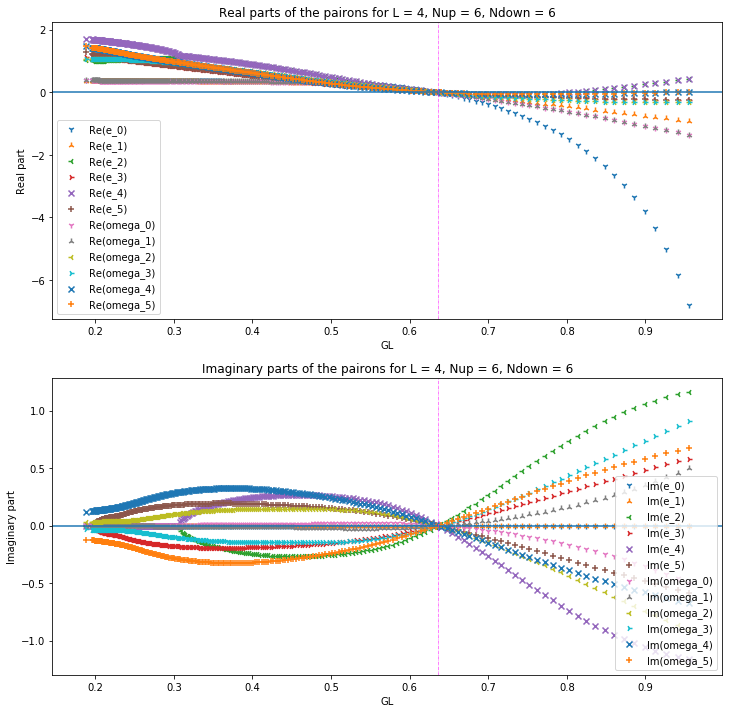

In [9]:
plt.figure(figsize=(12,12)) # Making a bigger figure for the plots

markers = ['1', '2', '3', '4', 'x', '+', '.', 'v', '^'] 
# using different shapes for the markers so we can see stacked results

plt.subplot(2,1,1) # Making 2 subplots, first for real parts
for i, ind in enumerate(real_e_index):
    # Plotting like before, but now assigning labels for the legend
    # Luckily, our rownames are decent labels already
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 
# Doing the same for real parts of omega
for i, ind in enumerate(real_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 

# Let's plot a horizontal line at 0
plt.axhline(0)

# Let's make a thin, vertical, dotted/dashed, magenta line at G_c
g_c = L/np.sum(k)
plt.axvline(g_c, ls='-.', color='magenta', linewidth=.5)
    
# Making axes labels
plt.title('Real parts of the pairons for L = {}, Nup = {}, Ndown = {}'.format(L, Nup, Ndown))
plt.xlabel('GL')
plt.ylabel('Real part')
plt.legend() 
    
plt.subplot(2,1,2) # Now moving to a second subplot
for i, ind in enumerate(im_e_index):
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 
for i, ind in enumerate(im_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i]) 

plt.axhline(0)
plt.axvline(g_c, ls='-.', color='magenta', linewidth=.5)    
    
plt.title('Imaginary parts of the pairons for L = {}, Nup = {}, Ndown = {}'.format(L, Nup, Ndown))
plt.xlabel('GL')
plt.ylabel('Imaginary part')
plt.legend()

plt.show()

We can change the limits of the axes to get a closer look at the behavior around G_c:

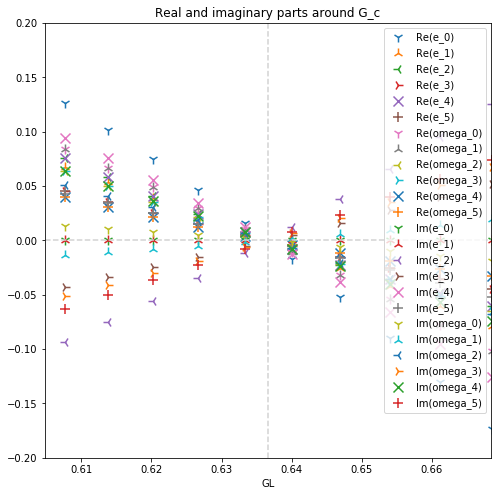

In [10]:
plt.figure(figsize=(8,8))

plt.axvline(g_c, ls = '--', color='lightgray')
plt.axhline(0, ls = '--', color='lightgray')

for i, ind in enumerate(real_e_index):
    # s is the size of the marks (not sure the units)
    # Let's make them bigger!
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(real_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(im_e_index):
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
for i, ind in enumerate(im_w_index): 
    plt.scatter(output_df['G']*L, output_df[ind], label=ind, marker=markers[i], s=100) 
    
plt.xlim(0.95*g_c, 1.05*g_c) # Looking within 5% of g_c
plt.ylim(-0.2, 0.2) # You might need to change these values

plt.legend()
plt.xlabel('GL')

plt.title('Real and imaginary parts around G_c')
plt.show()

As you probably noticed, the x-axis spacing isn't very even. 
This is because the relationship between G (our x axis) and g (the thing that is used in the Richardson-Gaudin equations).

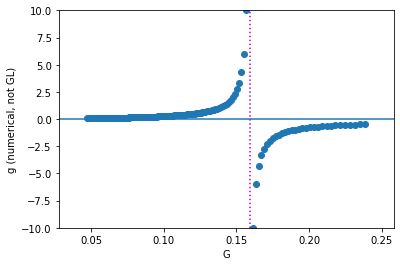

In [11]:
plt.scatter(output_df['G'], output_df['g'])
plt.xlabel('G')
plt.ylabel('g (numerical, not GL)')
plt.axhline(0)
plt.axvline(g_c/L, ls=':', color='m')
plt.ylim(-10, 10)
plt.show()

## Energy
We can also plot energy (and other things). Let's get the energy and derivatives from the output DataFrame.

Again, if there is a division by zero error, ignore it for now. This occurs if we are taking the derivative of something too close to vertical.

In [12]:
Es = output_df['energy']
Gs = output_df['G']
# Rescaling by appropriate factors of L
es = Es/L
gs = Gs*L # different than g in previous plot

print('Taking 1st derivative')
de = np.gradient(es, gs) # derivative de/dg
print('Taking 2nd derivative')
d2e = np.gradient(de, gs) # second derivative
print('Taking 3rd derivative')
d3e = np.gradient(d2e, gs) # third

Taking 1st derivative
Taking 2nd derivative
Taking 3rd derivative


Now, let's make a 2-by-2 plot with the energy and derivatives.

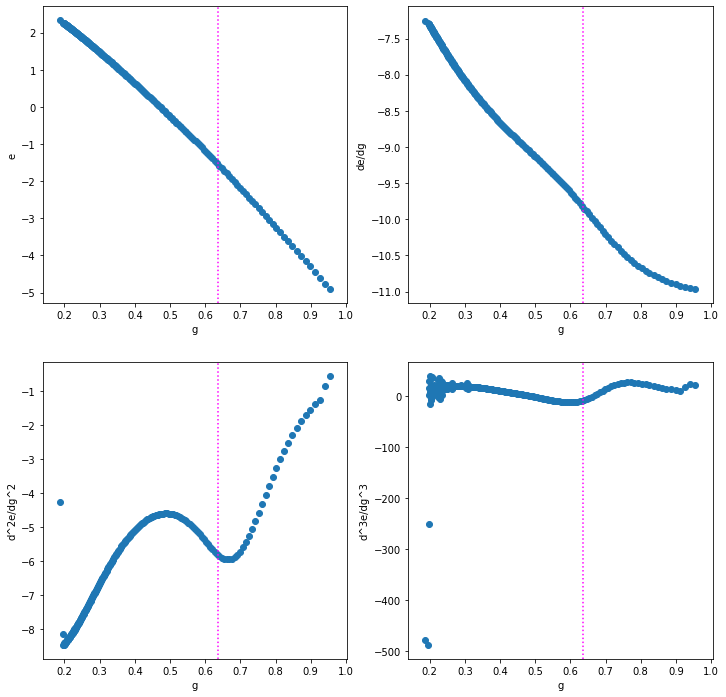

In [13]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.scatter(gs, es)
plt.xlabel('g')
plt.ylabel('e')
plt.axvline(g_c, ls=':', color='magenta')

plt.subplot(2, 2, 2)
plt.scatter(gs, de)
plt.xlabel('g')
plt.ylabel('de/dg')
plt.axvline(g_c, ls=':', color='magenta')


plt.subplot(2, 2, 3)
plt.scatter(gs, d2e)
plt.xlabel('g')
plt.ylabel('d^2e/dg^2')
plt.axvline(g_c, ls=':', color='magenta')


plt.subplot(2, 2, 4)
plt.scatter(gs, d3e)
plt.xlabel('g')
plt.ylabel('d^3e/dg^3')
plt.axvline(g_c, ls=':', color='magenta')

plt.show()

## Momentum Distribution

Let's look at the momentum distribution within $1\%$ of my prediction for $G_c$.

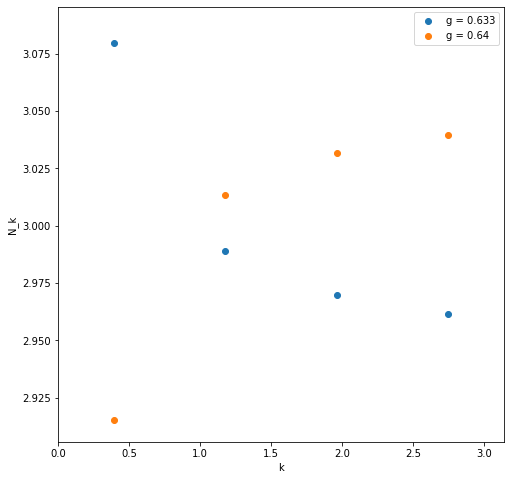

In [14]:
plt.figure(figsize=(8,8))

N_inds = ['N_{}'.format(i) for i in range(L)]
G_c = g_c/L
for i, G in enumerate(Gs):
    if 0.99 < G/G_c < 1.01: # Only selecting within 1% of G_c
        plt.scatter(k, output_df[N_inds].iloc[i], label='g = {}'.format(np.round(G*L, 3)))
plt.xlabel('k')
plt.ylabel('N_k')
plt.legend()
plt.xlim(0, np.pi)
plt.show()

This plot is hard for me to make sense of. 
Let's do a line plot to connect these dots. Also, let's plot a few more couplings.

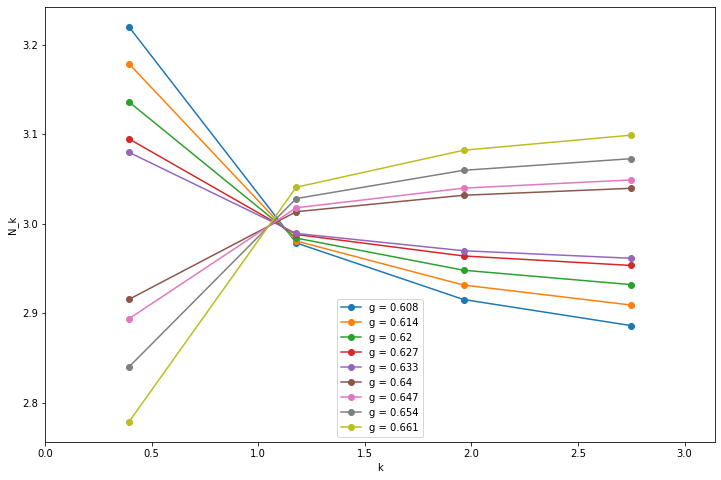

In [16]:
plt.figure(figsize=(12, 8))

for i, G in enumerate(Gs):
    if 0.95 < G/G_c < 1.05: # Only selecting within 2% of G_c
        plt.plot(k, output_df[N_inds].iloc[i], 
                label='g = {}'.format(np.round(G*L, 3)), # rounding the label to 3 decimal places
                 marker='o') # Putting a dot at each data point
plt.xlabel('k')
plt.ylabel('N_k')
plt.legend()
plt.xlim(0, np.pi)
plt.show()

At the actual critical coupling, it seems like Jorge's prediction of perfectly flat distribution is true, just not at the coupling he predicted.

To get a better sense of overall behavior, we can plot at a wider range of coupling. To make sure we don't end up with too many lines, I'll only plot once every 15 datapoints.

In [ ]:
for i, G in enumerate(Gs):
    if i%15 == 0: # Only using indices that are multiples of 15
        plt.plot(k, output_df[N_inds].iloc[i], 
                label='g = {}'.format(np.round(G*L, 3)), # rounding the label to 3 decimal places
                 marker='o') # Putting a dot at each data point
plt.xlabel('k')
plt.ylabel('N_k')
plt.legend()
plt.xlim(0, np.pi)
plt.ylim(0, 4) # Limits on values of N_k = n_{k up} + n_{k down} + n_{-k up} + n_{-k down}
plt.show()

# Checking results with exact diagonalization

To use my exact-diagonalization code, you will need the [Quspin package](https://weinbe58.github.io/QuSpin/).
First, we import functions from my exact-diagonalization code and create a basis for ``Nup`` spin up and ``Ndown``
spin down fermions on a 1-d lattice with ``2L`` sites (since ``L`` counts only positive $k$):

In [48]:
from exact_diag import ham_op_2, find_nk, form_basis
basis = form_basis(2*L, Nup, Ndown)

Now, we create a Hamiltonian (as Quspin ``quantum_operator`` object) corresponding to our final coupling.

In [49]:
H = ham_op_2(L, G_final, k, basis=basis)

Symmetry checks passed!
Particle conservation check passed!


We can diagonalize this Hamiltonian. Let's do full diagonalization if the dimension of the Hilbert space is
less than 4000, and do sparse diagonalization to only get the 10 lowest-energy states if it's larger than that.

Dimension of the Hilbert space:
14400


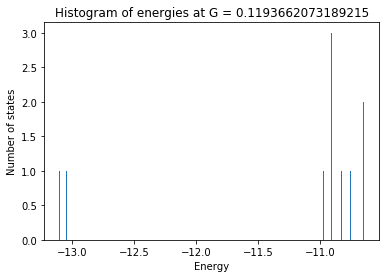

In [50]:
dim_h = basis.Ns
print('Dimension of the Hilbert space:')
print(dim_h)

if dim_h > 4000:
    exact_energies, exact_states = H.eigsh(k=10, which='SA') # k is number of states to find, SA means find the smallest algabraic eigenvalues
else:
    exact_energies, exact_states = H.eigh() # Full diagonalization of a Hermitian matrix
    
# Creating a histogram of the energies
plt.hist(exact_energies, bins=dim_h//50)
plt.xlabel('Energy')
plt.ylabel('Number of states')
plt.title('Histogram of energies at G = {}'.format(G_final))
plt.show()

Let's compare the ground state energy from ED to the final ground state energy from the RG equations:

In [51]:
print('ED ground state energy')
print(exact_energies[0]) 

print('RG ground state energy')
print(output_df['energy'].iloc[-1])

print('Difference')
print(exact_energies[0] - output_df['energy'].iloc[-1])

ED ground state energy
-13.10397578252774
RG ground state energy
-13.103975780610856
Difference
-1.9168844289652043e-09


Running on my machine, the difference is $8 \times 10^{-9}$. Previously, I was seeing accuracies around $10^{-16}$,
but it seems as though something changes when I switch to using $1/g$ to get past $G_c$.

We can see how the accuracy changes with G. Let's plot the difference in energy at every 5th coupling.

Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!


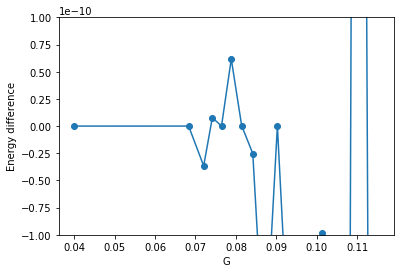

In [52]:
diffs = []
divisible_Gs = []
for i, G in enumerate(Gs):
    if i%5 == 0: # Only using indices that are multiples of 15
        h = ham_op_2(L, G, k, basis=basis)
        e, v = h.eigsh(k=1, which = 'SA') # we only need the 0th energy
        diffs += [e[0] - output_df['energy'].iloc[i]]
        divisible_Gs += [G]

plt.plot(divisible_Gs, diffs, marker='o')
plt.xlabel('G')
plt.ylabel('Energy difference')
plt.ylim(-10**-10, 10**-10)
plt.show()

It looks like the accuracy decreases significantly past the point at which I started incrementing ``1/g`` instead of ``g``. You can find the exact coupling at which this occurs by looking at the logs for when we solve the RG equations.

In my case, that occured at ``g = 0.8077710159024744`` (look for the first coupling after it says it started incrementing ``q``). Let's plot the error again, with a vertical line at the value of ``G`` that corresponds to this value of ``g``:

Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!
Symmetry checks passed!
Particle conservation check passed!


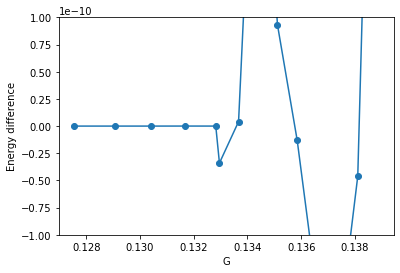

ValueError: x and y must have same first dimension, but have shapes (35,) and (14,)

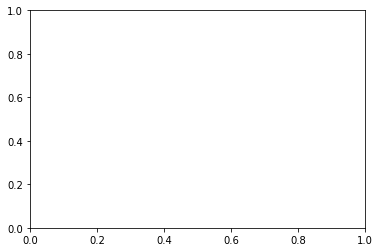

In [121]:
g_problem = 0.8077710159024744
G_problem = g_problem/(1 + g_problem * np.sum(k))

diffs = []
problem_Gs = []
for i, G in enumerate(Gs):
    if 0.95*G_problem < G < 1.05*G_problem: # Only using indices that are multiples of 15
        h = ham_op_2(L, G, k, basis=basis)
        e, v = h.eigsh(k=1, which = 'SA') # we only need the 0th energy
        diffs += [e[0] - output_df['energy'].iloc[i]]
        problem_Gs += [G]

plt.plot(problem_Gs, diffs, marker='o')
plt.xlabel('G')
plt.ylabel('Energy difference')
plt.ylim(-10**-10, 10**-10)
plt.show()

plt.plot(divisible_Gs, diffs, marker='o')
plt.axvline(G_problem, color = 'red', ls = '--')
plt.xlabel('G')
plt.ylabel('Energy difference')
plt.ylim(-10**-10, 10**-10)
plt.show()

In [ ]:
So, it seems very likely that 